# **Covid-19 Analysis**

In [1]:
# for auto-format
%load_ext nb_black

# for processing and scientific calculations
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

sns.set()

from plotly.offline import iplot

import plotly
import plotly.graph_objs as go

# for time series data
import datetime as dt

from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

# for plot width
desired_width = 3000
pd.set_option("display.width", desired_width)
np.set_printoptions(linewidth=desired_width)
pd.set_option("display.max_columns", 50)

# plt.style.use("fivethirtyeight")

<IPython.core.display.Javascript object>

In [2]:
import cufflinks as cf

cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

<IPython.core.display.Javascript object>

In [3]:
# Download the data

# import wget

# url = "https://statisticsnz.shinyapps.io/covid_19_dashboard/_w_6787eac7/session/3cbe9e2c741f3ad20a1f4a089dc56d31/download/download_data-downloadData?w=6787eac7"
# wget.download(url)

<IPython.core.display.Javascript object>

#### Filtered date from 2020 to see the impact covid has created on the public 

In [4]:
df = pd.read_csv("covid_19_data_portal.csv")

<IPython.core.display.Javascript object>

In [5]:
df.head()

,class,category,indicator_name,series_name,sub_series_name,parameter,value,units,date_last_updated
0,Economic,Employment,Weekly median earnings (34 days),Total,Total,2020-02-16,1036.58,$,11-02-21
1,Economic,Employment,Weekly median earnings (34 days),Total,Total,2020-02-23,1035.00,$,11-02-21
2,Economic,Employment,Weekly median earnings (34 days),Total,Total,2020-03-01,1028.37,$,11-02-21
3,Economic,Employment,Weekly median earnings (34 days),Total,Total,2020-03-08,1034.95,$,11-02-21
4,Economic,Employment,Weekly median earnings (34 days),Total,Total,2020-03-15,1036.19,$,11-02-21


<IPython.core.display.Javascript object>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89473 entries, 0 to 89472
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   class              89473 non-null  object 
 1   category           89473 non-null  object 
 2   indicator_name     89473 non-null  object 
 3   series_name        89473 non-null  object 
 4   sub_series_name    89473 non-null  object 
 5   parameter          89473 non-null  object 
 6   value              82891 non-null  float64
 7   units              89473 non-null  object 
 8   date_last_updated  89473 non-null  object 
dtypes: float64(1), object(8)
memory usage: 6.1+ MB


<IPython.core.display.Javascript object>

In [7]:
df["class"].value_counts()

Economic          60661
Health            21844
Income support     6052
Contextual          646
Social              270
Name: class, dtype: int64

<IPython.core.display.Javascript object>

# Split into three sections
#### 1) Analysis on Health
#### 2) Analysis on Employment
#### 3) Analysis on Social Wellbeing

# Exploratory Data Analysis
### Let's Dive

## 1) Analysis on Health 

In [8]:
df_health = df.loc[df["class"] == "Health"]

<IPython.core.display.Javascript object>

In [9]:
df_health.head()

,class,category,indicator_name,series_name,sub_series_name,parameter,value,units,date_last_updated
188,Health,Mental health,Worry about family health,undefined_name,Percentage of respondents,05-04-20,66.9,%,02-10-20
189,Health,Mental health,Worry about family health,undefined_name,Percentage of respondents_lower,05-04-20,63.6,%,02-10-20
190,Health,Mental health,Worry about family health,undefined_name,Percentage of respondents_upper,05-04-20,70.1,%,02-10-20
191,Health,Mental health,Worry about family health,undefined_name,Percentage of respondents,12-04-20,59.4,%,02-10-20
192,Health,Mental health,Worry about family health,undefined_name,Percentage of respondents_lower,12-04-20,56.0,%,02-10-20


<IPython.core.display.Javascript object>

In [10]:
df_health["category"].value_counts()

COVID-19          20391
Weekly deaths      1000
Mental health       321
General health      132
Name: category, dtype: int64

<IPython.core.display.Javascript object>

### 1.1 Mental Health

In [11]:
df_Mental = df_health.loc[df["category"] == "Mental health"]

<IPython.core.display.Javascript object>

In [12]:
df_Mental["parameter"] = pd.to_datetime(df_Mental["parameter"])

<IPython.core.display.Javascript object>

In [13]:
df_Mental.parameter.min()

Timestamp('2020-02-08 00:00:00')

<IPython.core.display.Javascript object>

In [14]:
df_Mental["indicator_name"].value_counts()

Nervousness                  66
Stress about leaving home    66
Depression / anxiety         66
Worry about family health    66
Calmness                     57
Name: indicator_name, dtype: int64

<IPython.core.display.Javascript object>

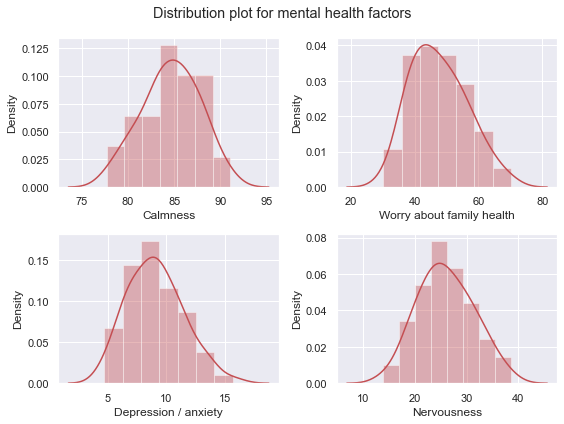

<IPython.core.display.Javascript object>

In [15]:
import warnings

warnings.filterwarnings("ignore")

plt.figure(figsize=(8, 6))
plt.suptitle('Distribution plot for mental health factors')
plt.subplot(2, 2, 1)

sns.distplot(
    df_Mental[df_Mental["indicator_name"] == "Calmness"].value,
    color="r",
    axlabel="Calmness",
)


plt.subplot(2, 2, 2)
sns.distplot(
    df_Mental[df_Mental["indicator_name"] == "Worry about family health"].value,
    color="r",
    axlabel="Worry about family health",
)
plt.subplot(2, 2, 3)
sns.distplot(
    df_Mental[df_Mental["indicator_name"] == "Depression / anxiety"].value,
    color="r",
    axlabel="Depression / anxiety",
)


plt.subplot(2, 2, 4)
sns.distplot(
    df_Mental[df_Mental["indicator_name"] == "Nervousness"].value,
    color="r",
    axlabel="Nervousness",
)
plt.tight_layout()

plt.show()


#### > We could see the respondents density for 'calmness' factor is comparatively higher than other factors

In [16]:
df_Mental = df_Mental[df_Mental["sub_series_name"] == "Percentage of respondents"]

<IPython.core.display.Javascript object>

In [17]:
df_Mental_Analysis = df_Mental.groupby(["indicator_name"])["value"].mean()

<IPython.core.display.Javascript object>

In [18]:
df_Mental_Analysis.iplot(
    kind="barh", title="Mental Health Factors", theme="pearl", xTitle="%"
)

<IPython.core.display.Javascript object>

#### > It is seen that most people feel this lockdown period to be calm and relaxed  

In [19]:
df_Mental.sort_values(by="parameter", ascending=True, inplace=True)

<IPython.core.display.Javascript object>

In [20]:
df_Mental.head()

,class,category,indicator_name,series_name,sub_series_name,parameter,value,units,date_last_updated
428,Health,Mental health,Calmness,undefined_name,Percentage of respondents,2020-02-08,86.6,%,02-10-20
305,Health,Mental health,Stress about leaving home,undefined_name,Percentage of respondents,2020-02-08,3.7,%,02-10-20
371,Health,Mental health,Nervousness,undefined_name,Percentage of respondents,2020-02-08,22.3,%,02-10-20
617,Health,Mental health,Depression / anxiety,undefined_name,Percentage of respondents,2020-02-08,6.8,%,02-10-20
239,Health,Mental health,Worry about family health,undefined_name,Percentage of respondents,2020-02-08,40.4,%,02-10-20


<IPython.core.display.Javascript object>

In [21]:
df_Mental = df_Mental[df_Mental["indicator_name"] == "Calmness"]



<IPython.core.display.Javascript object>

In [22]:
plot = go.Scatter(
    x=df_Mental['parameter'], y=df_Mental["value"], mode="lines+markers",name='Calmness',showlegend=False, marker = dict(color = 'rgba(16, 112, 2, 0.8)'))
data = [plot]
layout = dict(title = 'How the Calm factor affected over time',
              xaxis= dict(title= 'Date',ticklen= 5,zeroline= False),yaxis= dict(title= '%',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)



<IPython.core.display.Javascript object>

#### >  During lockdown most respondents feel they are calm and relaxed. 

### 1.2 General Health

In [23]:
df_G_Health = df_health.loc[df["category"] == "General health"]

<IPython.core.display.Javascript object>

In [24]:
df_G_Health.head()

,class,category,indicator_name,series_name,sub_series_name,parameter,value,units,date_last_updated
689,Health,General health,Sleep quantity,undefined_name,Percentage of respondents,05-04-20,71.3,%,02-10-20
690,Health,General health,Sleep quantity,undefined_name,Percentage of respondents_lower,05-04-20,68.4,%,02-10-20
691,Health,General health,Sleep quantity,undefined_name,Percentage of respondents_upper,05-04-20,74.2,%,02-10-20
692,Health,General health,Sleep quantity,undefined_name,Percentage of respondents,12-04-20,70.6,%,02-10-20
693,Health,General health,Sleep quantity,undefined_name,Percentage of respondents_lower,12-04-20,68.2,%,02-10-20


<IPython.core.display.Javascript object>

In [25]:
df_G_Health["parameter"] = pd.to_datetime(df_G_Health["parameter"])

<IPython.core.display.Javascript object>

In [26]:
df_G_Health["indicator_name"].value_counts()

Health status     66
Sleep quantity    66
Name: indicator_name, dtype: int64

<IPython.core.display.Javascript object>

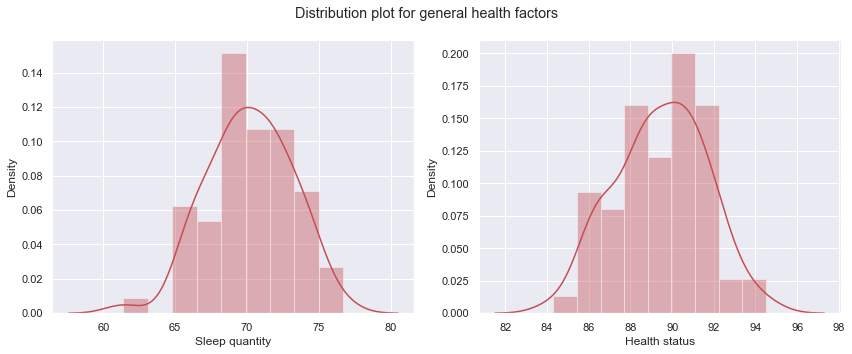

<IPython.core.display.Javascript object>

In [27]:
plt.figure(figsize=(12, 5))
plt.suptitle("Distribution plot for general health factors")
plt.subplot(1, 2, 1)
sns.distplot(
    df_G_Health[df_G_Health["indicator_name"] == "Sleep quantity"].value,
    color="r",
    axlabel="Sleep quantity",
)


plt.subplot(1, 2, 2)
sns.distplot(
    df_G_Health[df_G_Health["indicator_name"] == "Health status"].value,
    color="r",
    axlabel="Health status",
)

plt.tight_layout()
plt.show()

#### > More concerned towards Health status, lets try to delve more

In [28]:
df_G_Health_Analysis = df_G_Health.groupby(
    ["indicator_name", "parameter"], as_index=False
)["value"].mean()

<IPython.core.display.Javascript object>

In [29]:
df_G_Health_Analysis.sort_values(by="parameter", inplace=True)

<IPython.core.display.Javascript object>

In [30]:
df_G_Health_Analysis.head()

,indicator_name,parameter,value
0,Health status,2020-02-08,88.200000
22,Sleep quantity,2020-02-08,72.433333
1,Health status,2020-03-05,90.400000
23,Sleep quantity,2020-03-05,68.766667
2,Health status,2020-04-19,90.666667


<IPython.core.display.Javascript object>

In [31]:
# Creating trace1
trace1 = go.Scatter(
                    x = df_G_Health_Analysis[df_G_Health_Analysis["indicator_name"] == "Health status"].parameter,
                    y = df_G_Health_Analysis[df_G_Health_Analysis["indicator_name"] == "Health status"].value,
                    mode = "lines+markers",
                    name = "Health status",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
)
# Creating trace2
trace2 = go.Scatter(
                    x = df_G_Health_Analysis[df_G_Health_Analysis["indicator_name"] == "Sleep quantity"].parameter,
                    y = df_G_Health_Analysis[df_G_Health_Analysis["indicator_name"] == "Sleep quantity"].value,
                    mode = "lines+markers",
                    name = "Sleep quantity",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
)

data = [trace1, trace2]
layout = dict(title = 'Health status vs Sleep Quantity',
              xaxis= dict(title= 'Date',ticklen= 5,zeroline= False),yaxis= dict(title= '%',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)


<IPython.core.display.Javascript object>

#### > More respondents towards health status and most importantly they are positive towards health condition (good health), that's a positive sign amidst the pandemic year :)

### 1.3 Weekly Deaths

I believe weekly deaths data are not covid related as the values are high compared to the actual deceased which is just 25 across New Zealand till date.  

In [32]:
df_W_Deaths = df_health.loc[df["category"] == "Weekly deaths"]

<IPython.core.display.Javascript object>

In [33]:
df_W_Deaths1 = df_W_Deaths[df_W_Deaths["series_name"] != "Total"]

<IPython.core.display.Javascript object>

In [34]:
df_W_Deaths["indicator_name"].value_counts()

By age and sex    500
By region         250
By age            250
Name: indicator_name, dtype: int64

<IPython.core.display.Javascript object>

In [35]:
df_W_Deaths1.head()

,class,category,indicator_name,series_name,sub_series_name,parameter,value,units,date_last_updated
12465,Health,Weekly deaths,By age,Under 30,Under 30,2020-02-16,16.0,Number,09-02-21
12466,Health,Weekly deaths,By age,Under 30,Under 30,2020-02-23,21.0,Number,09-02-21
12467,Health,Weekly deaths,By age,Under 30,Under 30,2020-03-01,12.0,Number,09-02-21
12468,Health,Weekly deaths,By age,Under 30,Under 30,2020-03-08,13.0,Number,09-02-21
12469,Health,Weekly deaths,By age,Under 30,Under 30,2020-03-15,18.0,Number,09-02-21


<IPython.core.display.Javascript object>

In [36]:
patternDel = "Total"  # Removed Total Values as it will not be significant in Pie chart
filter = df_W_Deaths1["series_name"].str.contains(patternDel)

<IPython.core.display.Javascript object>

In [37]:
df_W_Deaths1 = df_W_Deaths1[~filter]

<IPython.core.display.Javascript object>

In [38]:
import plotly.express as px
import plotly.io as pio

pie_chart = px.pie(
    data_frame=df_W_Deaths1,
    values=df_W_Deaths1[df_W_Deaths1["indicator_name"] == "By age"].value,
    names=df_W_Deaths1[df_W_Deaths1["indicator_name"] == "By age"]["series_name"],
    color=df_W_Deaths1[df_W_Deaths1["indicator_name"] == "By age"]["series_name"],
    title="Deaths by Age",
)
pio.show(pie_chart)

<IPython.core.display.Javascript object>

In [39]:
pie_chart = px.pie(
    data_frame=df_W_Deaths1,
    values=df_W_Deaths1[df_W_Deaths1["indicator_name"] == "By age and sex"].value,
    names=df_W_Deaths1[df_W_Deaths1["indicator_name"] == "By age and sex"]["series_name"],
    color=df_W_Deaths1[df_W_Deaths1["indicator_name"] == "By age and sex"][
        "series_name"
    ],  
    title="Deaths by Age and Sex",  
)
pio.show(pie_chart)


<IPython.core.display.Javascript object>

In [40]:
df_W_Deaths_Filter = df_W_Deaths1.copy()

<IPython.core.display.Javascript object>

#### Lets try to analyze by gender on a whole

In [41]:
df_W_Deaths_Filter["series_name"] = df_W_Deaths_Filter["series_name"].apply(
    lambda x: x.split()[0]
)  # to extract Female amd Male from the column

<IPython.core.display.Javascript object>

In [42]:
pie_chart = px.pie(
    data_frame=df_W_Deaths_Filter,
    values=df_W_Deaths_Filter[
        df_W_Deaths_Filter["indicator_name"] == "By age and sex"
    ].value,
    names=df_W_Deaths_Filter[df_W_Deaths_Filter["indicator_name"] == "By age and sex"][
        "series_name"
    ],
    color=df_W_Deaths_Filter[df_W_Deaths_Filter["indicator_name"] == "By age and sex"][
        "series_name"
    ],
    title="Deaths by Gender",
)
pio.show(pie_chart)

<IPython.core.display.Javascript object>

#### > It's seen that both male and female have similar percentage towards loss of life with male being slighlty higher 

In [43]:
df_W_Deaths_Filter["parameter"] = pd.to_datetime(df_W_Deaths_Filter["parameter"])

<IPython.core.display.Javascript object>

In [44]:
df_W_Deaths1.set_index("parameter", inplace=True)

<IPython.core.display.Javascript object>

In [45]:
df_W_Deaths1.head()

,class,category,indicator_name,series_name,sub_series_name,value,units,date_last_updated
parameter,,,,,,,,
2020-02-16,Health,Weekly deaths,By age,Under 30,Under 30,16.0,Number,09-02-21
2020-02-23,Health,Weekly deaths,By age,Under 30,Under 30,21.0,Number,09-02-21
2020-03-01,Health,Weekly deaths,By age,Under 30,Under 30,12.0,Number,09-02-21
2020-03-08,Health,Weekly deaths,By age,Under 30,Under 30,13.0,Number,09-02-21
2020-03-15,Health,Weekly deaths,By age,Under 30,Under 30,18.0,Number,09-02-21


<IPython.core.display.Javascript object>

In [46]:
df_W_Deaths1.sort_index(ascending=True, inplace=True)

<IPython.core.display.Javascript object>

In [47]:
trace1 = go.Scatter(
    x=df_W_Deaths1[df_W_Deaths1["series_name"] == "Auckland"].index,
    y=df_W_Deaths1[df_W_Deaths1["series_name"] == "Auckland"].value,
    mode="lines+markers",
    name="Auckland",
    marker=dict(color="rgba(16, 112, 2, 0.8)"),
    text=df_W_Deaths1[df_W_Deaths1["series_name"] == "Auckland"],
)

trace2 = go.Scatter(
    x=df_W_Deaths1[df_W_Deaths1["series_name"] == "Canterbury"].index,
    y=df_W_Deaths1[df_W_Deaths1["series_name"] == "Canterbury"].value,
    mode="lines+markers",
    name="Canterbury",
    marker=dict(color="rgba(80, 26, 80, 0.8)"),
    text=df_W_Deaths1[df_W_Deaths1["series_name"] == "Canterbury"],
)

trace3 = go.Scatter(
    x=df_W_Deaths1[df_W_Deaths1["series_name"] == "Other South Island regions"].index,
    y=df_W_Deaths1[df_W_Deaths1["series_name"] == "Other South Island regions"].value,
    mode="lines+markers",
    name="Other South Island regions",
    marker=dict(color="rgba(350, 60, 25, 0.8)"),
    text=df_W_Deaths1[df_W_Deaths1["series_name"] == "Other South Island regions"],
)

trace4 = go.Scatter(
    x=df_W_Deaths1[df_W_Deaths1["series_name"] == "Other North Island regions"].index,
    y=df_W_Deaths1[df_W_Deaths1["series_name"] == "Other North Island regions"].value,
    mode="lines+markers",
    name="Other North Island regions",
    marker=dict(color="rgba(220, 99, 25, 0.8)"),
    text=df_W_Deaths1[df_W_Deaths1["series_name"] == "Other North Island regions"],
)


data = [trace1, trace2, trace3, trace4]
layout = dict(
    title="Deaths by region",
    xaxis=dict(title="Date", ticklen=5, zeroline=False),
    yaxis=dict(title="Number", ticklen=5, zeroline=False),
)
fig = dict(data=data, layout=layout)
iplot(fig)

<IPython.core.display.Javascript object>

#### > It is evident that most populated places have more deaths

### 1.4 Covid-19

In [48]:
df_Covid = df_health.loc[df["category"] == "COVID-19"]

<IPython.core.display.Javascript object>

In [49]:
df_Covid["indicator_name"].value_counts()

Number of cases (other countries)           18564
Number of cases                               966
Tests per day                                 640
Source of cases                               100
Status of cases                                63
Case demographics                              39
Quarantine and managed isolation figures       19
Name: indicator_name, dtype: int64

<IPython.core.display.Javascript object>

In [50]:
pie_chart = px.pie(
    data_frame=df_Covid,
    values=df_Covid[df_Covid["series_name"] == "Cases by age"].value,
    names=df_Covid[df_Covid["series_name"] == "Cases by age"]["parameter"],
    title="Cases demographics - by age (Recovery rate)",
)
pio.show(pie_chart)

<IPython.core.display.Javascript object>

#### > it's seen that youngsters (20-29) have had the most recovery rate compared to other age groups

In [51]:
pie_chart = px.pie(
    data_frame=df_Covid,
    values=df_Covid[df_Covid["series_name"] == "Cases by ethnicity"].value,
    names=df_Covid[df_Covid["series_name"] == "Cases by ethnicity"]["parameter"],
    title="Cases demographics - by ethnicity",
)
pio.show(pie_chart)

<IPython.core.display.Javascript object>

#### > European's were affected the most among all other ethnicity

In [52]:
x = df_Covid[
    (df_Covid["indicator_name"] == "Status of cases")
    & (df_Covid["sub_series_name"] == "Recovered")
]
data = [
    go.Scatterpolar(
        r=[
            x[x["parameter"] == "Waitematā"].value.values[0],
            x[x["parameter"] == "Auckland"].value.values[0],
            x[x["parameter"] == "Counties Manukau"].value.values[0],
            x[x["parameter"] == "Southern"].value.values[0],
            x[x["parameter"] == "Waikato"].value.values[0],
            x[x["parameter"] == "Canterbury"].value.values[0],
            x[x["parameter"] == "Managed Isolation & Quarantine"].value.values[0],
        ],
        theta=[
            "Waitematā",
            "Auckland",
            "Counties Manukau",
            "Southern",
            "Waikato",
            "Canterbury",
            "Managed Isolation & Quarantine",
        ],
        fill="toself",
    )
]

layout = go.Layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 600])),
    showlegend=False,
    title="Recovered cases by region",
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

<IPython.core.display.Javascript object>

#### > Most of them were recovered from Managed isolation facility, also we could see Waitemata with almost half the population as of Auckland managed to have more recovery

In [53]:
x = df_Covid[(df_Covid["indicator_name"] == "Source of cases")]
trace0 = go.Scatterpolar(
    r=[
        x[x["sub_series_name"] == "Imported"].value.sum(),
        x[x["sub_series_name"] == "Import-related"].value.sum(),
        x[x["sub_series_name"] == "Locally acquired, linked"].value.sum(),
        x[x["sub_series_name"] == "Locally acquired, unknown source"].value.sum(),
        x[x["sub_series_name"] == "Under investigation"].value.sum(),
    ],
    theta=[
        "Imported",
        "Import-related",
        "Locally acquired, linked",
        "Locally acquired, unknown source",
        "Under investigation",
    ],
    fill="toself",
    name="Overall",
)


trace1 = go.Scatterpolar(
    r=[
        x[
            (x["sub_series_name"] == "Imported") & (x["parameter"] == "Auckland")
        ].value.values[0],
        x[
            (x["sub_series_name"] == "Import-related") & (x["parameter"] == "Auckland")
        ].value.values[0],
        x[
            (x["sub_series_name"] == "Locally acquired, linked")
            & (x["parameter"] == "Auckland")
        ].value.values[0],
        x[
            (x["sub_series_name"] == "Locally acquired, unknown source")
            & (x["parameter"] == "Auckland")
        ].value.values[0],
        x[
            (x["sub_series_name"] == "Under investigation")
            & (x["parameter"] == "Auckland")
        ].value.values[0],
    ],
    theta=[
        "Imported",
        "Import-related",
        "Locally acquired, linked",
        "Locally acquired, unknown source",
        "Under investigation",
    ],
    fill="toself",
    name="Auckland",
)


data = [trace0, trace1]

layout = go.Layout(
    polar=dict(radialaxis=dict(visible=False, range=[0, 1200])),
    showlegend=True,
    title="Source of Cases Overall vs Auckland",
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

<IPython.core.display.Javascript object>

#### > It is seen that we have acquired most of the cases from outside, kudos to the government in controlling the local cases by planned lockdown measures 

In [54]:
patternDel = "Total"
filter = df_Covid["series_name"].str.contains(patternDel)

<IPython.core.display.Javascript object>

In [55]:
df_Covid1 = df_Covid[~filter]

<IPython.core.display.Javascript object>

In [56]:
df_Covid1 = df_Covid1[df_Covid1["indicator_name"] == "Tests per day"]

<IPython.core.display.Javascript object>

In [57]:
df_Covid1["parameter"] = pd.to_datetime(df_Covid1["parameter"]).map(
    lambda x: x.strftime("%Y-%m")
)

<IPython.core.display.Javascript object>

In [58]:
df_Covid1 = df_Covid1.groupby(["parameter"], as_index=False)["value"].sum()

<IPython.core.display.Javascript object>

In [59]:
df_Covid1.value.sum()  # total test till date

1468814.0

<IPython.core.display.Javascript object>

Total tests till date = 1.4M 

In [60]:
# df_Covid1.drop_duplicates(subset="parameter", inplace=True)

<IPython.core.display.Javascript object>

In [61]:
df_Covid2 = df_Covid[df_Covid["indicator_name"] == "Number of cases"]
df_Covid2 = df_Covid2[df_Covid2["sub_series_name"] == "Active"]

<IPython.core.display.Javascript object>

In [62]:
df_Covid2.head(10)

,class,category,indicator_name,series_name,sub_series_name,parameter,value,units,date_last_updated
81102,Health,COVID-19,Number of cases,New Zealand,Active,2020-02-28,1.0,Number,12-02-21
81103,Health,COVID-19,Number of cases,New Zealand,Active,2020-02-29,1.0,Number,12-02-21
81104,Health,COVID-19,Number of cases,New Zealand,Active,2020-03-01,1.0,Number,12-02-21
81105,Health,COVID-19,Number of cases,New Zealand,Active,2020-03-02,1.0,Number,12-02-21
81106,Health,COVID-19,Number of cases,New Zealand,Active,2020-03-03,1.0,Number,12-02-21
81107,Health,COVID-19,Number of cases,New Zealand,Active,2020-03-04,3.0,Number,12-02-21
81108,Health,COVID-19,Number of cases,New Zealand,Active,2020-03-05,3.0,Number,12-02-21
81109,Health,COVID-19,Number of cases,New Zealand,Active,2020-03-06,4.0,Number,12-02-21
81110,Health,COVID-19,Number of cases,New Zealand,Active,2020-03-07,5.0,Number,12-02-21
81111,Health,COVID-19,Number of cases,New Zealand,Active,2020-03-08,5.0,Number,12-02-21


<IPython.core.display.Javascript object>

In [63]:
df_Covid2["parameter"] = pd.to_datetime(df_Covid2["parameter"]).map(
    lambda x: x.strftime("%Y-%m")
)
df_Covid2.drop_duplicates(
    subset="parameter", keep="last", inplace=True
)  # Assuming Active data is additive in the df

<IPython.core.display.Javascript object>

In [64]:
# df_Covid2 = df_Covid2.groupby(["parameter"], as_index=False)["value"].sum()

<IPython.core.display.Javascript object>

In [65]:
trace1 = go.Scatter(
    x=df_Covid1.parameter,
    y=df_Covid1.value,
    mode="lines+markers",
    name="Tests per Month",
    marker=dict(color="rgba(255, 2, 2, 0.8)"),
)
trace2 = go.Scatter(
    x=df_Covid2.parameter,
    y=df_Covid2.value,
    mode="lines+markers",
    name="Number of positive cases",
    marker=dict(color="rgba(102, 12, 60, 0.8)"),
)

data = [trace1, trace2]
layout = dict(
    title="No of tests vs No of positive cases",
    xaxis=dict(title="Date", ticklen=5, zeroline=False),
    yaxis=dict(title="Number", ticklen=5, zeroline=False),
)
fig = dict(data=data, layout=layout)
iplot(fig)

<IPython.core.display.Javascript object>

Let's visualise the positive cases in a better way

In [66]:
trace2 = go.Scatter(
    x=df_Covid2.parameter,
    y=df_Covid2.value,
    mode="lines+markers",
    name="Number of positive cases",
    marker=dict(color="rgba(102, 12, 60, 0.8)"),
)

data = [trace2]
layout = dict(
    title="No of positive cases",
    xaxis=dict(title="Date", ticklen=5, zeroline=False),
    yaxis=dict(title="Number", ticklen=5, zeroline=False),
)
fig = dict(data=data, layout=layout)
iplot(fig)

<IPython.core.display.Javascript object>

#### > As the cases spiked during March and so do the number of tests which has led to decrease in cases. 

## 2) Analysis on Employment

In [67]:
# Downloading the data for 'Jobs online measure by industry' as this section was missing when downloading the entire set

# import wget

# url = "https://statisticsnz.shinyapps.io/covid_19_dashboard/_w_44b150d3/session/df36af007c474a5316455353128d1ec8/download/download_data-downloadData?w=44b150d3"
# wget.download(url)

<IPython.core.display.Javascript object>

In [68]:
df_e = pd.read_csv("covid_19_data_portal (2).csv", parse_dates=["parameter"])

<IPython.core.display.Javascript object>

In [69]:
df_e.head()

,class,category,indicator_name,series_name,sub_series_name,parameter,value,units,date_last_updated
0,Economic,Employment,Jobs online measure by industry,"Accounting, HR, legal and admin","Accounting, HR, legal and admin",2007-05-01,100.0,Index,12-02-21
1,Economic,Employment,Jobs online measure by industry,"Accounting, HR, legal and admin","Accounting, HR, legal and admin",2007-06-01,91.5,Index,12-02-21
2,Economic,Employment,Jobs online measure by industry,"Accounting, HR, legal and admin","Accounting, HR, legal and admin",2007-07-01,93.4,Index,12-02-21
3,Economic,Employment,Jobs online measure by industry,"Accounting, HR, legal and admin","Accounting, HR, legal and admin",2007-08-01,96.2,Index,12-02-21
4,Economic,Employment,Jobs online measure by industry,"Accounting, HR, legal and admin","Accounting, HR, legal and admin",2007-09-01,84.5,Index,12-02-21


<IPython.core.display.Javascript object>

In [70]:
# Filtering date to analyze before and after covid

df_e_before = df_e[
    (df_e["parameter"] >= "2019-01-01") & (df_e["parameter"] < "2020-01-01")
]
df_e_after = df_e[
    (df_e["parameter"] >= "2020-01-01") & (df_e["parameter"] < "2021-01-01")
]



<IPython.core.display.Javascript object>

In [71]:
def plot(st):
    trace0 = go.Box(
        y=df_e_before[df_e_before["sub_series_name"] == st].value,
        name="Before Covid - 2019",
    )
    trace1 = go.Box(
        y=df_e_after[df_e_after["sub_series_name"] == st].value,
        name="During Covid - 2020",
    )
    layout = go.Layout(title=st)
    data = [trace0, trace1]

    fig = go.Figure(data=data, layout=layout)

    return iplot(fig)



<IPython.core.display.Javascript object>

In [72]:
for name in df_e.sub_series_name.unique():
    plot(name)

<IPython.core.display.Javascript object>

Let's do some predictive analysis

In [73]:
df1 = pd.read_csv("employment.csv", parse_dates=["parameter"])

<IPython.core.display.Javascript object>

In [74]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   class              165 non-null    object        
 1   category           165 non-null    object        
 2   indicator_name     165 non-null    object        
 3   series_name        165 non-null    object        
 4   sub_series_name    165 non-null    object        
 5   parameter          165 non-null    datetime64[ns]
 6   value              165 non-null    float64       
 7   units              165 non-null    object        
 8   date_last_updated  165 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 11.7+ KB


<IPython.core.display.Javascript object>

In [75]:
df1 = df1.loc[(df1["parameter"] >= "2016-01-01")]

<IPython.core.display.Javascript object>

In [76]:
df1 = df1.rename(columns={"parameter": "ds", "value": "y"})

<IPython.core.display.Javascript object>

In [77]:
df2 = df1[["ds", "y"]]

<IPython.core.display.Javascript object>

In [78]:
df2.reset_index(drop="index", inplace=True)

<IPython.core.display.Javascript object>

### Using Facebook's Prophet to forecast job advertisements

In [79]:
from fbprophet import Prophet

m = Prophet()
m.fit(df2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<IPython.core.display.Javascript object>

In [80]:
future = m.make_future_dataframe(periods=7, freq="M")
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(6)

,ds,yhat,yhat_lower,yhat_upper
62,2021-02-28,141.590238,116.889394,163.783262
63,2021-03-31,135.310105,112.708312,158.061417
64,2021-04-30,147.504028,125.979514,170.543826
65,2021-05-31,93.635059,71.510565,114.940403
66,2021-06-30,126.985817,106.648895,150.050433
67,2021-07-31,138.441452,115.629986,161.507817


<IPython.core.display.Javascript object>

In [81]:
pred = forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(6)

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Forecast job advertisements')

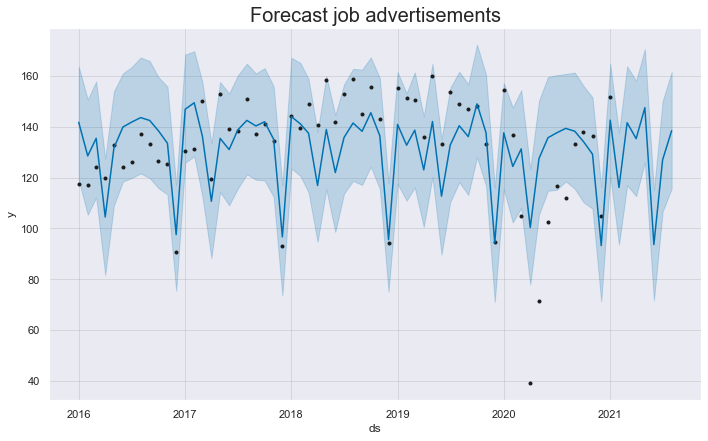

<IPython.core.display.Javascript object>

In [82]:
fig = m.plot(forecast)
plt.title("Forecast job advertisements", fontsize=20)

Let's zoom in to see a clear picture

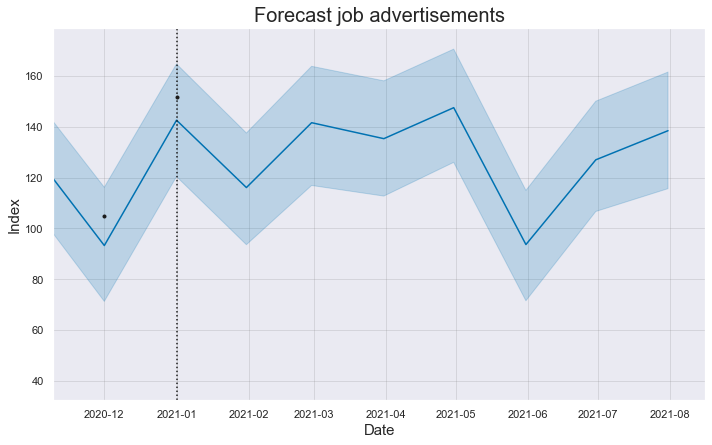

<IPython.core.display.Javascript object>

In [83]:
fig = m.plot(forecast)
# datenow = datetime.now()
today = datetime.today()
datem = datetime(today.year, today.month, 1)
datem = datem + relativedelta()
dateend = datem + timedelta(weeks=28)
datestart = dateend - timedelta(weeks=40)
plt.xlim([datestart, dateend])
plt.title("Forecast job advertisements", fontsize=20)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Index", fontsize=15)
datem = datem + relativedelta(months=-1)

plt.axvline(datem, color="k", linestyle=":")

plt.show()

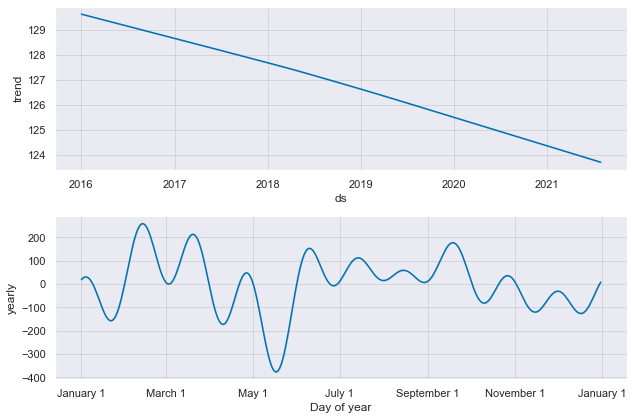

<IPython.core.display.Javascript object>

In [113]:
m.plot_components(forecast)
# trend

In [85]:
from fbprophet.diagnostics import cross_validation  # Test

df_cv = cross_validation(m, initial="730 days", period="182.5 days", horizon="360 days")
df_cv.head()

INFO:fbprophet:Making 5 forecasts with cutoffs between 2018-01-07 00:00:00 and 2020-01-07 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-02-01,144.959909,144.797976,145.149097,139.7,2018-01-07
1,2018-03-01,171.044098,170.408852,171.711218,149.1,2018-01-07
2,2018-04-01,116.887217,115.634123,118.235196,140.8,2018-01-07
3,2018-05-01,172.642648,170.612513,174.819609,158.5,2018-01-07
4,2018-06-01,155.977384,153.147697,159.131949,141.9,2018-01-07


<IPython.core.display.Javascript object>

In [86]:
from fbprophet.diagnostics import performance_metrics

performance_metrics(df_cv, rolling_window=1)


,horizon,mse,rmse,mae,mape,mdape,coverage
0,360 days,850.742289,29.167487,18.096843,0.219516,0.067142,0.216667


<IPython.core.display.Javascript object>

In [87]:
# from fbprophet.plot import plot_cross_validation_metric

# fig = plot_cross_validation_metric(df_cv, metric="rmse")

<IPython.core.display.Javascript object>

## 2) Analysis on Social Wellbeing

In [88]:
df_social = df.loc[df["class"] == "Social"]

<IPython.core.display.Javascript object>

In [89]:
df_social.head()

,class,category,indicator_name,series_name,sub_series_name,parameter,value,units,date_last_updated
443,Social,General wellbeing,Overall wellbeing,undefined_name,Percentage of respondents,26-04-20,23.2,%,02-10-20
444,Social,General wellbeing,Overall wellbeing,undefined_name,Percentage of respondents_lower,26-04-20,20.5,%,02-10-20
445,Social,General wellbeing,Overall wellbeing,undefined_name,Percentage of respondents_upper,26-04-20,25.8,%,02-10-20
446,Social,General wellbeing,Overall wellbeing,undefined_name,Percentage of respondents,03-05-20,19.0,%,02-10-20
447,Social,General wellbeing,Overall wellbeing,undefined_name,Percentage of respondents_lower,03-05-20,16.2,%,02-10-20


<IPython.core.display.Javascript object>

In [90]:
df_social["category"].value_counts()

Social connection     75
General wellbeing     57
Life satisfaction     57
Household finances    50
Personal finances     16
Crime and safety      15
Name: category, dtype: int64

<IPython.core.display.Javascript object>

In [91]:
df_social_crime = df_social.loc[df_social["category"] == "Crime and safety"]

<IPython.core.display.Javascript object>

In [92]:
df_social_crime["indicator_name"].value_counts()

COVID-19 related scams                              9
Safety travelling to and from essential services    6
Name: indicator_name, dtype: int64

<IPython.core.display.Javascript object>

In [93]:
trace0 = go.Box(
    y=df_social_crime[
        df_social_crime["indicator_name"] == "COVID-19 related scams"
    ].value,
    name="COVID-19 related scams",
)
trace1 = go.Box(
    y=df_social_crime[
        df_social_crime["indicator_name"]
        == "Safety travelling to and from essential services"
    ].value,
    name="Safety travelling to and from essential services",
)

layout = go.Layout(title="Crime and Safety")
data = [trace0, trace1]

fig = go.Figure(data=data, layout=layout)

iplot(fig)

<IPython.core.display.Javascript object>

#### > It is seen that under the crime section, respondents have reacted highly towards safety measures in a positive manner than scams which is really a good sign

In [94]:
df_social_crime[
    df_social_crime["indicator_name"]
    == "Safety travelling to and from essential services"
].sort_values(by="parameter").head(10)

,class,category,indicator_name,series_name,sub_series_name,parameter,value,units,date_last_updated
3366,Social,Crime and safety,Safety travelling to and from essential services,undefined_name,Percentage of respondents,11 - 20 April,73.6,%,10-08-20
3370,Social,Crime and safety,Safety travelling to and from essential services,undefined_name,Percentage of respondents,12 - 18 May,86.1,%,10-08-20
3371,Social,Crime and safety,Safety travelling to and from essential services,undefined_name,Percentage of respondents,19 - 25 May,88.6,%,10-08-20
3367,Social,Crime and safety,Safety travelling to and from essential services,undefined_name,Percentage of respondents,21 - 27 April,80.6,%,10-08-20
3368,Social,Crime and safety,Safety travelling to and from essential services,undefined_name,Percentage of respondents,28 April - 4 May,86.2,%,10-08-20
3369,Social,Crime and safety,Safety travelling to and from essential services,undefined_name,Percentage of respondents,5 - 11 May,80.7,%,10-08-20


<IPython.core.display.Javascript object>

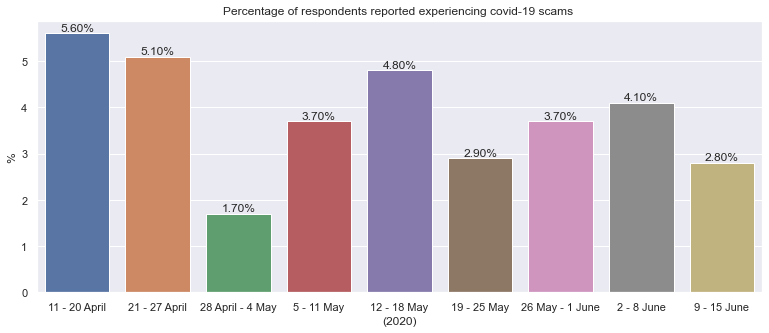

<IPython.core.display.Javascript object>

In [95]:
plt.figure(figsize=(13, 5))
ax = sns.barplot(
    x=df_social_crime[
        df_social_crime["indicator_name"] == "COVID-19 related scams"
    ].parameter,
    y=df_social_crime[
        df_social_crime["indicator_name"] == "COVID-19 related scams"
    ].value,
    data=df_social_crime,
)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.0,
        height + 0.05,
        "{:1.2f}%".format(height),
        ha="center",
    )

plt.title("Percentage of respondents reported experiencing covid-19 scams ")
plt.xlabel("(2020)")
plt.ylabel("%")
plt.show()

#### > More scams were reported by respondents just after the level 4 lockdown

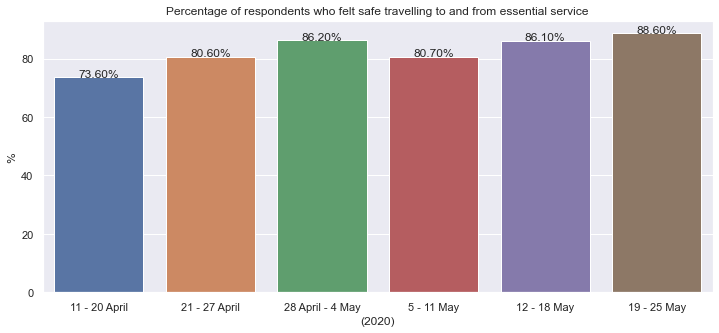

<IPython.core.display.Javascript object>

In [96]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(
    x=df_social_crime[
        df_social_crime["indicator_name"]
        == "Safety travelling to and from essential services"
    ].parameter,
    y=df_social_crime[
        df_social_crime["indicator_name"]
        == "Safety travelling to and from essential services"
    ].value,
    data=df_social_crime,
)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.0,
        height + 0.05,
        "{:1.2f}%".format(height),
        ha="center",
    )

plt.title(
    "Percentage of respondents who felt safe travelling to and from essential service"
)
plt.xlabel("(2020)")
plt.ylabel("%")
plt.show()

#### > On an Average people have felt safe travelling during the alert level 2 than alert level 3 and 4 

In [97]:
df_social_wellbeing = df_social.loc[df_social["category"] == "General wellbeing"]

<IPython.core.display.Javascript object>

In [98]:
df_social_wellbeing["indicator_name"].value_counts()

Overall wellbeing    57
Name: indicator_name, dtype: int64

<IPython.core.display.Javascript object>

In [99]:
df_social_wellbeing["parameter"] = pd.to_datetime(
    df_social_wellbeing["parameter"], format="%d-%m-%y"
)

<IPython.core.display.Javascript object>

In [100]:
# df_social_wellbeing.sort_values(by="parameter")

<IPython.core.display.Javascript object>

In [101]:
df_social_wellbeing = df_social_wellbeing.groupby(["parameter"], as_index=False)[
    "value"
].mean()

<IPython.core.display.Javascript object>

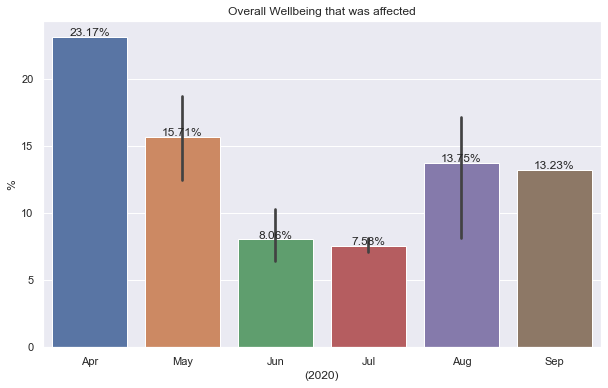

<IPython.core.display.Javascript object>

In [102]:
plt.figure(figsize=(10, 6))


ax = sns.barplot(
    x=df_social_wellbeing.parameter.apply(lambda x: x.strftime("%b")),
    y=df_social_wellbeing.value,
    data=df_social_wellbeing,
)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.0,
        height + 0.05,
        "{:1.2f}%".format(height),
        ha="center",
    )

plt.title("Overall Wellbeing that was affected")
plt.xlabel("(2020)")
plt.ylabel("%")
plt.show()

#### > Alert level 4 has impacted a lot on people's Wellbeing

In [103]:
df_social_house_finance = df_social.loc[df_social["category"] == "Household finances"]

<IPython.core.display.Javascript object>

In [104]:
df_social_house_finance = df_social_house_finance[
    df_social_house_finance["indicator_name"]
    == "Confidence in household's financial situation"
]

<IPython.core.display.Javascript object>

In [105]:
df_social_house_finance.head()

,class,category,indicator_name,series_name,sub_series_name,parameter,value,units,date_last_updated
1523,Social,Household finances,Confidence in household's financial situation,undefined_name,Wave 1,Not at all confident,4.7,%,27-01-21
1524,Social,Household finances,Confidence in household's financial situation,undefined_name,Wave 2,Not at all confident,4.3,%,27-01-21
1525,Social,Household finances,Confidence in household's financial situation,undefined_name,Wave 1,Not confident,19.0,%,27-01-21
1526,Social,Household finances,Confidence in household's financial situation,undefined_name,Wave 2,Not confident,16.6,%,27-01-21
1527,Social,Household finances,Confidence in household's financial situation,undefined_name,Wave 1,Neither/nor,23.5,%,27-01-21


<IPython.core.display.Javascript object>

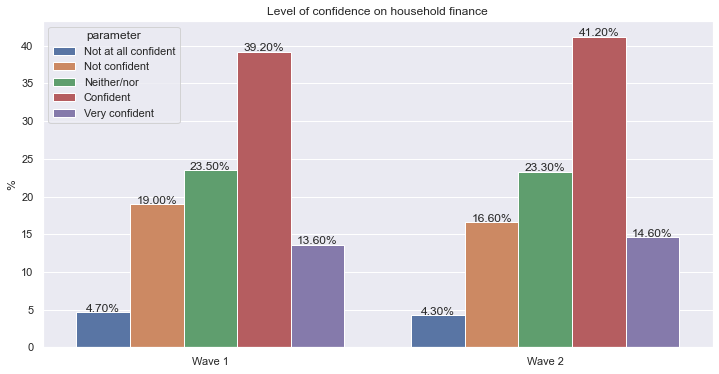

<IPython.core.display.Javascript object>

In [106]:
plt.figure(figsize=(12, 6))


ax = sns.barplot(
    x=df_social_house_finance.sub_series_name,
    y=df_social_house_finance.value,
    hue=df_social_house_finance.parameter,
    data=df_social_house_finance,
)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.0,
        height + 0.05,
        "{:1.2f}%".format(height),
        ha="center",
    )

plt.title("Level of confidence on household finance")
plt.xlabel(None)
plt.ylabel("%")
plt.show()

#### > Thanks to Wage subsidy scheme, it has boosted the confidence level on household finance in both the waves.

In [107]:
df_social_pers_finance = df_social.loc[df_social["category"] == "Personal finances"]

<IPython.core.display.Javascript object>

In [108]:
df_social_pers_finance.head()

,class,category,indicator_name,series_name,sub_series_name,parameter,value,units,date_last_updated
1467,Social,Personal finances,Effects of COVID-19 on work and income,undefined_name,Wave 1,Temporarily laid off work and not receiving sa...,32.5,%,27-01-21
1468,Social,Personal finances,Effects of COVID-19 on work and income,undefined_name,Wave 2,Temporarily laid off work and not receiving sa...,26.9,%,27-01-21
1469,Social,Personal finances,Effects of COVID-19 on work and income,undefined_name,Wave 1,Lost job* and now unemployed,16.4,%,27-01-21
1470,Social,Personal finances,Effects of COVID-19 on work and income,undefined_name,Wave 2,Lost job* and now unemployed,13.8,%,27-01-21
1471,Social,Personal finances,Effects of COVID-19 on work and income,undefined_name,Wave 1,Earnings fallen substantially,12.0,%,27-01-21


<IPython.core.display.Javascript object>

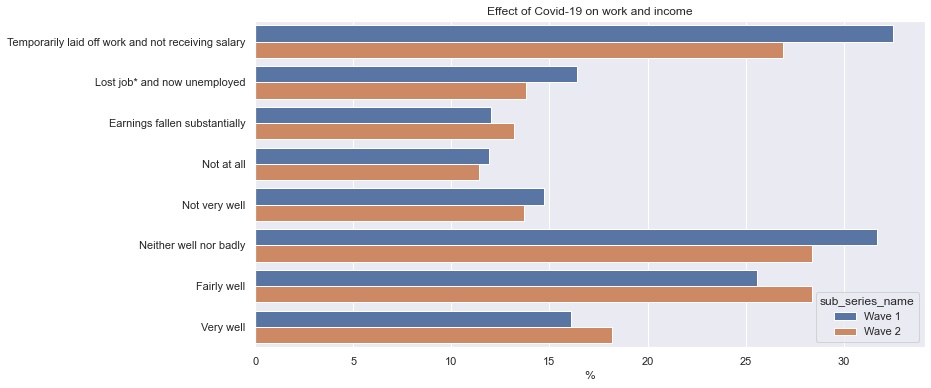

<IPython.core.display.Javascript object>

In [109]:
plt.figure(figsize=(12, 6))


g = sns.barplot(
    x=df_social_pers_finance.value,
    y=df_social_pers_finance.parameter,
    hue=df_social_pers_finance.sub_series_name,
    data=df_social_pers_finance,
)


plt.title("Effect of Covid-19 on work and income")
plt.xlabel("%")
plt.ylabel(None)
plt.show()

#### > Covid has drasticaly affected work and income in both the waves and many had to lose jobs on top of goverment providing subsidy. Which indicates many of the lost job workers are from daily wage/ one-off employees

In [110]:
df_social_connect = df_social.loc[df_social["category"] == "Social connection"]

<IPython.core.display.Javascript object>

In [111]:
df_social_connect = df_social_connect[
    df_social_connect["indicator_name"] == "Loneliness - past 7 days"
]

<IPython.core.display.Javascript object>

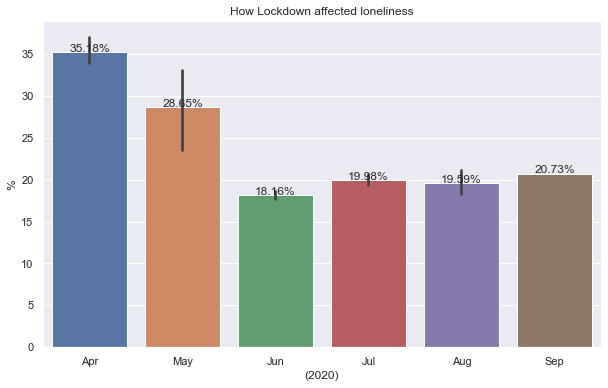

<IPython.core.display.Javascript object>

In [112]:
df_social_connect["parameter"] = pd.to_datetime(
    df_social_connect["parameter"], format="%d-%m-%y"
)
df_social_connect = df_social_connect.groupby(["parameter"], as_index=False)[
    "value"
].mean()

plt.figure(figsize=(10, 6))


ax = sns.barplot(
    x=df_social_connect.parameter.apply(
        lambda x: x.strftime("%b")
    ),  # to get short version of month name
    y=df_social_connect.value,
    data=df_social_connect,
)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.0,
        height + 0.05,
        "{:1.2f}%".format(height),
        ha="center",
    )

plt.title("How Lockdown affected loneliness")
plt.xlabel("(2020)")
plt.ylabel("%")
plt.show()

#### > Alert level 4 lockdown has left many to feel lonely. But even after the lockdown the loneliness factor has been constant. That's the area that we should further look at what's the cause.

Thank you :)